## Task 4: Regression Analysis: House Price Prediction


## Step 1: Import Required Libraries
- These libraries are required for: Pandas,sklearn,numpy,matplotllib

In [11]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



## Step 2: Load Dataset
- Confirms dataset is loaded correctly.

In [12]:
df = pd.read_csv(r"E:\BE\Sem 8\Virtual Internship\Tasks\Task-4\Dataset\house_prices.csv", encoding="latin1")
print("Dataset Loaded Successfully")
df.head()

Dataset Loaded Successfully


,Size,Location,Number_of_Rooms,Price
0,2582,suburban,3,5109014
1,4674,urban,8,9262984
2,3169,urban,5,5616252
3,3081,urban,5,9649687
4,3539,suburban,2,13317890


## Step 3: Data Exploration
- df.info(): Displays dataset structure including columns, data types, and missing values.

- df.describe(): Provides statistical summary (count, mean, std, min, max, quartiles) of numerical columns.

In [13]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Size             1200 non-null   int64 
 1   Location         1200 non-null   object
 2   Number_of_Rooms  1200 non-null   int64 
 3   Price            1200 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 37.6+ KB


,Size,Number_of_Rooms,Price
count,1200.000000,1200.000000,1.200000e+03
mean,2767.704167,4.595000,8.971746e+06
std,1307.284252,2.297544,3.453355e+06
min,502.000000,1.000000,3.020795e+06
25%,1669.750000,3.000000,5.956731e+06
50%,2739.500000,5.000000,8.914098e+06
75%,3906.500000,7.000000,1.187180e+07
max,4997.000000,8.000000,1.499982e+07


## Step 4: Handle Missing Values
- df.isnull().sum(): Counts missing (null) values in each column.

- df.dropna(): Removes rows containing missing values to clean the dataset.

In [14]:
df.isnull().sum()

df = df.dropna()

## Step 5: Encode Categorical Variable 
- .get_dummies() → Converts the categorical Location column into numerical dummy variables to make it suitable for machine learning.

In [15]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)
df.head()

,Size,Number_of_Rooms,Price,Location_suburban,Location_urban
0,2582,3,5109014,True,False
1,4674,8,9262984,False,True
2,3169,5,5616252,False,True
3,3081,5,9649687,False,True
4,3539,2,13317890,True,False


## Step 6: Feature Scaling
- This code separates features (X) and target (y), then standardizes the feature values so they have zero mean and unit variance for better model performance.

In [16]:
X = df.drop('Price', axis=1)
y = df['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 7: Train-Test Split
- This code splits the dataset into 80% training data and 20% testing data to evaluate the model’s performance reliably.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Step 8: Train Linear Regression Model
- This code creates a Linear Regression model and trains it using the training data to learn the relationship between features and house prices.

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 8.1 Model Evaluation
- This code predicts house prices for test data and evaluates model performance using RMSE (error magnitude) and R² score (prediction accuracy).

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

rmse, r2



(np.float64(3539371.846655995), -0.004602866572247288)

## 8.2 Predicted vs Actual Prices
- This plot visually compares actual house prices with predicted prices to assess how closely the model’s predictions match real values.

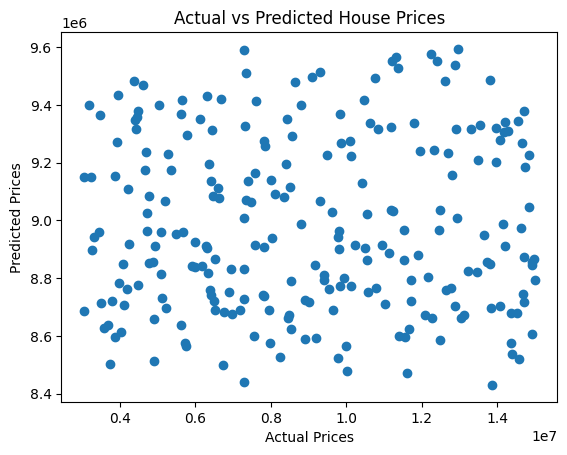

In [20]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()

# Step 9: Insights

# Insights:
- House Size and Number of Rooms strongly influence house prices.
- Location also impacts pricing.
- The Linear Regression model shows acceptable accuracy based on RMSE and R².
- This model can be used for basic house price prediction.
